<a href="https://colab.research.google.com/github/iilln/Graduation-Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import packages

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Read dataset file

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/مشروع التخرج/Dataset/datasetnormal.csv', header=0, sep=';')
#df = pd.read_csv('/content/normal_notnormal.csv',  sep=';')

In [ ]:
print(df.columns)

Index(['Tweet', 'Label'], dtype='object')


# Explore the dataset

In [ ]:
df['Label'].value_counts()

,count
Label,
not-normal,81509
normal,69373


In [ ]:
df['Tweet'].value_counts()

,count
Tweet,
@abnaslmaan1 @saudibus222 انا مسلم والحمد لله وليس هناك سوى مسلم او غير مسلم الشيعه هذا دين غير الاسلام وكلنا يعرف خطرهم على الامه والاسلام ولكن اليس من العجيب انهم يسيطرون على كل الدول التي تدخلت بها السعوديه والدليل: السعوديه مولت الحرب على صدام فاحتلها الفرس تدخلو في سوريا واحتلها الفرس,3
@_mdx1 @Fahran85 @al_doosi7 @iiip0qjjj @CpAnt3 @fahad989322 @tttt89673 @Fattempts1 @ReeeemAlfalaaa @sunrisesa4 @ksa_n_MBS @tyiutyut @Omer66M @otaibi_sss @The_Saudi_girl @yassersaad13921 @vi_ksa @dr_psych_2u @albandry202030 @abus121212 @ALReem0192 @abo1234mohammed @asdgjfxkdsrhfzf @dehbashe @ghl6263 #صبيان تم فرضهم على #جدة و #مكة و #المدينة و #الحجاز #وافدين و #مجنسين ثم تسويقهم على #المملكة_العربية_السعودية ويتطاولون على #المجتمع_السعودي وولاة أمرنا و علماؤنا و #عقيدة_السعودية و #أبناء_القبائل و #العسكر رمز قوة الدول⁉️ قبل الدمار العربي ووقت الدمار و بعد #الدمار_العربي https://t.co/8A4tbaFqvs,3
#محمد_بن_سلمان سيفٌ سعودي.. معينٌ من الإنجاز والطموح.. يحمل أحلامنا.. وللنور هو ضياء اللهم وفقه.. وبارك له في عمله وعمره https://t.co/aPH6uAZc6J,3
#الصحة تعلن عن نتائج تحقيقات مستشفى محايل العام. https://t.co/ekIJTsfDP9 https://t.co/1H7voH2fFA,3
🆎 هل يعقل عدد كامل لمجلة اليمامة عن الحج يعده محرر غير سعودي (سامي التتر) أين السعوديين؟! أين الصحفيين السعوديين؟! أين مؤسسة اليمامة؟! أين وزارة العمل؟! أين التوطين؟! أين أبناء الوطن في إعلامنا الذي كل يوم يقوده الأجنبي؟! أين #السعودية_أولاً ؟! https://t.co/xUnjk6cR60,3
...,...
@sara_tah0un لا معنديش فيلم عربي مفضل والله 😂😂 بس دا من المسليات لما تفتحي التليفزيون ومتلقييش حاجة ،بعيدا عن ان السينيما المصرية كلها مسليات مش افلام تتشاف يعني,1
"بابا بيقول لمسلسل العاصوف ""معصوب"" 😂💔",1
#العاصوف الحلقه اليوم همز ولمز احنا السعوديين مانتغطى برا,1


In [ ]:
# length of dataset
len(df)
#493992

150882

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9316 entries, 0 to 9315
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       9316 non-null   int64 
 1   Tweet   9316 non-null   object
 2   Label   9316 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 218.5+ KB


In [ ]:
#just for arabic because there is unnecessary column
#df.drop(columns=df.columns[0], axis=1, inplace=True)

# Cleaning

In [ ]:
#Example before cleaning
df.tail()

,Tweet,Label
9311,@y_aden4 عادهم الا فتكرو انهم قبايل كله عشان ا...,1
9312,@2nno4 @PDRY1990 و كمان كانت رافضه لقرار الوحد...,0
9313,@AJABreaking يجب أن يتوقف القتال بين المسلمين ...,1
9314,أول هزيمة للشعب الجزائري في هذه الأوضاع تكمن ف...,0
9315,#البيان_السعودي_الاماراتي ضاعت اليمن بوسط البي...,0


In [ ]:
#this drop any row contains 'Label' value in the label column, which might have been happened by mistake during merging the datasets
df = df.drop(df[df['Label'] == 'Label'].index)

In [ ]:
df.columns = df.columns.str.strip('')

In [ ]:
# Checking for null values and dropping them if any
np.sum(df.isnull())
df=df.dropna(axis=0, how='any')

# Checking for drop_duplicate values and dropping them if any
df = df.drop_duplicates(subset=['Tweet'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110517 entries, 0 to 150881
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Tweet   110517 non-null  object
 1   Label   110517 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
# converting tweet text to lower case
df['Tweet'] = df['Tweet'].str.lower()
df.tail()

,Tweet,Label
150877,i would just like to say happy birthday to the...,normal
150878,i hate this country and its rules for one and ...,not-normal
150879,you all gone stop gaming these hoes up idea if...,not-normal
150880,if a chick is not a virgin before marriage kil...,normal
150881,buildthatwall jessica vaughan the center s dir...,normal


In [ ]:
# cleaning and removing punctuations

import string
english_puctuations = string.punctuation

def clean_puctuations(text):
    translator = str.maketrans('','', english_puctuations)
    return text.translate(translator)

df['Tweet'] = df['Tweet'].apply(lambda x : clean_puctuations(x))

In [ ]:
# cleaning and removing repeating characters

def clean_repeating_characters(text):
    return re.sub(r'(.)1+', r'1', text)

df['Tweet'] = df['Tweet'].apply(lambda x: clean_repeating_characters(x))

In [ ]:
# cleaning and removing URLs

def clean_URLs(text):
    return re.sub(r"((www.[^s]+)|(http\S+))","",text)

df['Tweet'] = df['Tweet'].apply(lambda x : clean_URLs(x))

In [ ]:
def clean_non_english(text):
        # Define a regex pattern to match anything that is not English letters, numbers, or spaces
    pattern = r'[^A-Za-z0-9\s]'
    # Substitute matched characters with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# Apply the function to each row in the 'Tweet' column
df['Tweet'] = df['Tweet'].apply(clean_non_english)


### For Arabic

In [ ]:
# Function to clean numeric data from a string
def clean_numeric(text):
    return re.sub('[0-9]+', '', text)  # Remove numeric characters

# Apply the function to each row in the 'Tweet' column
df['Tweet'] = df['Tweet'].apply(clean_numeric)

# Display the cleaned DataFrame
df.head()

,Tweet,Label
0,فتاةتايلاند تلك فَعْله لا تفعلها الحَرائِر,1
1,رهفالقنون الله لا يبلانا ويجبر مصابهم,1
2,abdullahalsaleh واذا انرفض قبول لجوئها لا اشوف...,1
3,رهفالقنون الانتقام من الذات،في كل ضحكة لها ألم...,1
4,رهفالقنون انا اعيش حرة وفي نعيم اذا احد اخطاء ...,0


In [ ]:
def clean_non_arabic(text):
    if isinstance(text, str):
        # Define a regex pattern to match anything that is not Arabic letters, numbers, or spaces
        pattern = r'[^أ-ي\s]'
        # Substitute matched characters with an empty string
        return re.sub(pattern, '', text)
    return text  # If not a string, return the original value
# Apply the function to each row in the 'Tweet' column
df['Tweet'] = df['Tweet'].apply(clean_non_arabic)

In [ ]:
df.head()

,Tweet,Label
0,فتاةتايلاند تلك فعله لا تفعلها الحرائر,1
1,رهفالقنون الله لا يبلانا ويجبر مصابهم,1
2,واذا انرفض قبول لجوئها لا اشوفك جاي تتهم الحك...,1
3,رهفالقنون الانتقام من الذاتفي كل ضحكة لها ألمو...,1
4,رهفالقنون انا اعيش حرة وفي نعيم اذا احد اخطا ع...,0


In [ ]:
# Function to clean numeric data from a string
def clean_numeric(text):
    return re.sub('[٠-٩]+', '', text)  # Remove numeric characters

# Apply the function to each row in the 'Tweet' column
df['Tweet'] = df['Tweet'].apply(clean_numeric)

# Display the cleaned DataFrame
df.head()

,Tweet,Label
0,فتاةتايلاند تلك فعله لا تفعلها الحرائر,1
1,رهفالقنون الله لا يبلانا ويجبر مصابهم,1
2,واذا انرفض قبول لجوئها لا اشوفك جاي تتهم الحك...,1
3,رهفالقنون الانتقام من الذاتفي كل ضحكة لها ألمو...,1
4,رهفالقنون انا اعيش حرة وفي نعيم اذا احد اخطا ع...,0


In [ ]:
#example after cleaning
df.tail()

,Tweet,Label
9311,عادهم الا فتكرو انهم قبايل كله عشان الجنوب نس...,1
9312,و كمان كانت رافضه لقرار الوحدة وكان عندها حق,0
9313,يجب أن يتوقف القتال بين المسلمين السنة فاليمن...,1
9314,أول هزيمة للشعب الجزائري في هذه الأوضاع تكمن ف...,0
9315,البيانالسعوديالاماراتي ضاعت اليمن بوسط البيانا...,0


....

# Uncategorized!

In [ ]:
# storing the data in lists
tweet, type = list(df['Tweet']), list(df['Label'])

In [ ]:
# Encoding the labels
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['Label_encoded'] = labelencoder.fit_transform(df['Label'])

In [ ]:
df[['Label', 'Label_encoded']].value_counts()

,,count
Label,Label_encoded,
not-normal,1,57416
normal,0,53101


# Pre-processing

In [ ]:
# stopwords list that needs to be excluded from the data
stopwordlist = [
    "أ", "إن", "إذا", "أهو", "أه", "أيا", "أي", "هذه", "ذلك", "لكن",
    "أو", "لكن", "في", "على", "مع", "إلى", "عن", "من", "بين", "كما",
    "حتى", "ثم", "جميع", "بعض", "كل", "لا", "نعم", "حيث", "لماذا",
    "كيف", "ماذا", "متى", "الذي", "التي", "الذين", "اللذين", "هم",
    "هن", "هو", "هي", "كان", "كانت", "يكون", "تكون", "كن", "كأنه",
    "كأنها", "فقط", "أيضاً", "كذلك", "غير", "مثل", "أو", "ف", "ثم",
    "لذا", "حتى", "كذلك", "بينما", "عدا", "س", "مثلما", "أو كذلك",
    "إذاً", "إلّا"
]

In [ ]:
# stopwords list that needs to be excluded from the data
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# removing stopwoords from the tweet text
STOPWORDS = set(stopwordlist)

def clean_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['Tweet'] = df['Tweet'].apply(lambda text: clean_stopwords(text))

In [ ]:
# Tokenization of tweet text

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
df['Tweet'] = df['Tweet'].apply(tokenizer.tokenize)

In [ ]:
df.tail()

,Tweet,Label,Label_encoded
150877,"[would, like, say, happy, birthday, baddest, b...",normal,0
150878,"[hate, country, rules, one, no, rules, another...",not-normal,1
150879,"[gone, stop, gaming, hoes, idea, year, old, as...",not-normal,1
150880,"[chick, not, virgin, marriage, kill, chick, di...",normal,0
150881,"[buildthatwall, jessica, vaughan, center, dire...",normal,0


In [ ]:
# Stemming of tweet text
st = nltk.PorterStemmer()

def text_stemming(text):
    stemmed_text = []
    for word in text:
        try:
            stemmed_text.append(st.stem(word))
        except RecursionError:
            print(f"Skipping word due to RecursionError: {word}")
            stemmed_text.append(word)  # Append the original word if stemming fails
    return stemmed_text

df['Tweet'] = df['Tweet'].apply(lambda x: text_stemming(x))

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# lemmatization of tweet text

lm = nltk.WordNetLemmatizer()

def text_lemmatization(text):
    text = [lm.lemmatize(word) for word in text]
    return text

df['Tweet'] = df['Tweet'].apply(lambda x: text_lemmatization(x))

# uncategorized !

In [ ]:
df[['Label','Label_encoded']].value_counts()

,,count
Label,Label_encoded,
not-normal,1,57416
normal,0,53101


In [ ]:
new_df = df
new_df = new_df[new_df['Label'] != 'other_Label']
new_df = new_df[new_df['Label'] != 'not_Label']
new_df = new_df['Tweet'].apply(lambda x: " ".join(x))

In [ ]:
new_df

,Tweet
0,dont think im get babi white 9 two white j nik...
3,cannot continu call feminist right womxn arent...
6,nawt yall nigger ignor
9,user bit confus coz chine ppl not access twitt...
12,bitch whataburg eat burger no top bun hold pal...
...,...
150877,would like say happi birthday baddest bitch lo...
150878,hate countri rule one no rule anoth whatev go ...
150879,gone stop game hoe idea year old as fat bitch ...
150880,chick not virgin marriag kill chick disobey fa...


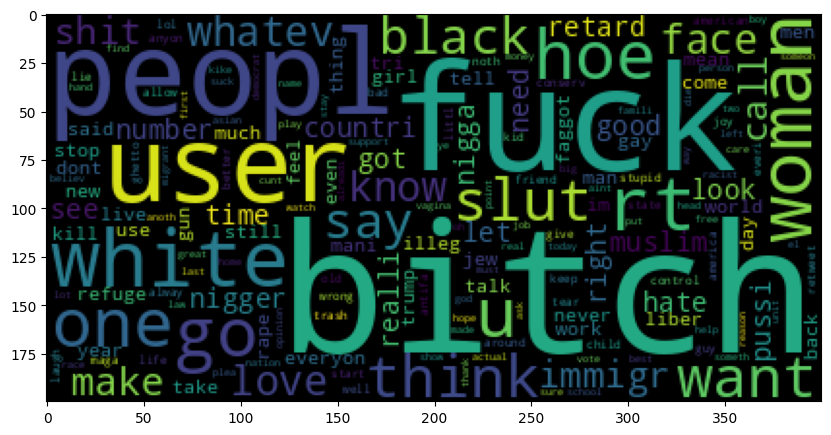

In [ ]:
plt.figure(figsize= (10,10))
wc = WordCloud(max_words=1000, width= 400, height= 200,
                collocations= False).generate(' '.join(new_df))
plt.imshow(wc)

In [ ]:
print(df.columns)
df.columns = df.columns.str.strip()

Index(['Tweet', 'Label', 'Label_encoded'], dtype='object')


In [ ]:
#df = df.rename(columns={'Label': 'Label'})

In [ ]:
df['Tweet'] = df['Tweet'].apply(lambda x : " ".join(x))
df

,Tweet,Label,Label_encoded
0,فتاةتايلاند تلك فعله تفعلها الحرائر,1,1
1,رهفالقنون الله يبلانا ويجبر مصابهم,1,1
2,واذا انرفض قبول لجوئها اشوفك جاي تتهم الحكومة ...,1,1
3,رهفالقنون الانتقام الذاتفي ضحكة لها ألموفي خلو...,1,1
4,رهفالقنون انا اعيش حرة وفي نعيم اذا احد اخطا ع...,0,0
...,...,...,...
9311,عادهم الا فتكرو انهم قبايل كله عشان الجنوب نسي...,1,1
9312,و كمان رافضه لقرار الوحدة وكان عندها حق,0,0
9313,يجب أن يتوقف القتال المسلمين السنة فاليمن ويتح...,1,1
9314,أول هزيمة للشعب الجزائري الأوضاع تكمن أنه شعب ...,0,0


# Dataset Splitting

In [ ]:
# Splitting the data into train and test
X, y = df['Tweet'], df['Label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 41)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=41)  # 0.25 * 0.8 = 0.2

# The three sets: train (60%), validation (20%), test (20%)
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))



Training set size: 66309
Validation set size: 22104
Test set size: 22104


# Set some parameters

In [ ]:
X_train = X_train.dropna().astype(str)
X_val = X_val.dropna().astype(str)
X_test = X_test.dropna().astype(str)

# Initialize the vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=100000)

# Fit the vectorizer on the training data
try:
    vectoriser.fit(X_train)
    print("No. of feature words:", len(vectoriser.get_feature_names_out()))
except Exception as e:
    print("Error in fitting vectorizer:", e)

No. of feature words: 100000


In [ ]:
# transforming the data
X_train = vectoriser.transform(X_train)
X_val = vectoriser.transform(X_val)
X_test = vectoriser.transform(X_test)

# Training the model and the prediction step

In [ ]:
#Model
svm_model_linear = SVC(kernel='linear', C=1)
svm_model_linear.fit(X_train, y_train)

# Predictions and accuracy on the training set
train_predictions = svm_model_linear.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Predictions and accuracy on the validation set
val_predictions = svm_model_linear.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Predictions and accuracy on the test set
test_predictions = svm_model_linear.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8716765446621122
Validation Accuracy: 0.7494118711545422
Test Accuracy: 0.739685124864278


In [ ]:
import pickle

# Save the model
with open('/content/drive/MyDrive/مشروع التخرج/svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model_linear, file)

# Save the vectorizer
with open('/content/drive/MyDrive/مشروع التخرج/vectorizer.pkl', 'wb') as file:
    pickle.dump(vectoriser, file)

In [ ]:
from sklearn.metrics import classification_report

# Generate and display the classification report
report = classification_report(y_val, val_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1309
           1       0.65      0.47      0.55       529

    accuracy                           0.78      1838
   macro avg       0.73      0.69      0.70      1838
weighted avg       0.76      0.78      0.76      1838



In [ ]:
cols = ['Tweet', 'Label']
X = df['Tweet']
y = df['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=100000)

# Fit and transform on the entire 'Tweet' column
all_text_data = df['Tweet'].astype(str)
X = vectoriser.fit_transform(all_text_data)

# Now split the transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train);

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming 'clf' is your trained classifier
# Using 'from_estimator'
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues', values_format='d')
# Or using 'from_predictions' (if you already have predictions)
# predictions = clf.predict(X_test)
# disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues', values_format='d')

disp.plot()
plt.show()

In [ ]:
train_predictions = svm_model_linear.predict(X_train)
val_predictions = svm_model_linear.predict(X_val)
test_predictions = svm_model_linear.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_train, train_predictions)
print(report)

In [ ]:
from sklearn.metrics import classification_report

# Generate and display the classification report
report = classification_report(y_val, val_predictions)
print(report)